In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
%matplotlib inline

pd.options.display.max_columns = 100

In [2]:
training_data = pd.read_csv('training_data.csv')
training_data.drop(columns=['Unnamed: 0'])

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
2,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,40000,2,2,1,38,0,0,3,2,2,2,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0,1
22496,350000,1,1,1,42,-1,-1,-1,-1,-1,-1,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731,0
22497,100000,2,3,2,46,1,-1,2,2,-1,0,0,203,203,0,7856,16544,203,0,0,7856,10000,865,0
22498,20000,2,3,1,50,-1,-1,-1,-1,-2,-2,5141,3455,6906,0,0,0,3754,6906,290,0,0,0,1


In [3]:
# marital status has more that 2 options, drop the third option as it appears meaningless. 

The data is all strings, need to convert to int. 

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 25 columns):
Unnamed: 0    22500 non-null object
X1            22500 non-null object
X2            22500 non-null object
X3            22500 non-null object
X4            22500 non-null object
X5            22500 non-null object
X6            22500 non-null object
X7            22500 non-null object
X8            22500 non-null object
X9            22500 non-null object
X10           22500 non-null object
X11           22500 non-null object
X12           22500 non-null object
X13           22500 non-null object
X14           22500 non-null object
X15           22500 non-null object
X16           22500 non-null object
X17           22500 non-null object
X18           22500 non-null object
X19           22500 non-null object
X20           22500 non-null object
X21           22500 non-null object
X22           22500 non-null object
X23           22500 non-null object
Y             22500 non-nul

# Data Cleaning

In [5]:
training_data.rename(columns = {"X1": "credit_amount", 
                     "X2":"gender", 
                     "X3":"education", 
                     "X4":"marital_status", 
                     "X5":"age", 
                     "X6":"repay_status_sept",
                     "X7":"repay_status_aug",
                     "X8":"repay_status_jul",
                     "X9":"repay_status_jun",
                     "X10":"repay_status_may",
                     "X11":"repay_status_apr",
                    "X12":"statement_amt_sept",
                    "X13":"statement_amt_aug",
                    "X14":"statement_amt_jul",
                    "X15":"statement_amt_jun",
                    "X16":"statement_amt_may",
                    "X17":"statement_amt_apr",
                    "X18":"amt_paid_sept",
                    "X19":"amt_paid_aug",
                    "X20":"amt_paid_jul",
                    "X21":"amt_paid_jun",
                    "X22":"amt_paid_may",
                    "X23":"amt_paid_april",
                    "Y":"defaulted"}, inplace = True) 
training_data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 24 columns):
credit_amount         22500 non-null object
gender                22500 non-null object
education             22500 non-null object
marital_status        22500 non-null object
age                   22500 non-null object
repay_status_sept     22500 non-null object
repay_status_aug      22500 non-null object
repay_status_jul      22500 non-null object
repay_status_jun      22500 non-null object
repay_status_may      22500 non-null object
repay_status_apr      22500 non-null object
statement_amt_sept    22500 non-null object
statement_amt_aug     22500 non-null object
statement_amt_jul     22500 non-null object
statement_amt_jun     22500 non-null object
statement_amt_may     22500 non-null object
statement_amt_apr     22500 non-null object
amt_paid_sept         22500 non-null object
amt_paid_aug          22500 non-null object
amt_paid_jul          22500 non-null object
amt_paid_ju

In [7]:
training_data

,credit_amount,gender,education,marital_status,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,statement_amt_sept,statement_amt_aug,statement_amt_jul,statement_amt_jun,statement_amt_may,statement_amt_apr,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,defaulted
0,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
2,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,40000,2,2,1,38,0,0,3,2,2,2,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0,1
22496,350000,1,1,1,42,-1,-1,-1,-1,-1,-1,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731,0
22497,100000,2,3,2,46,1,-1,2,2,-1,0,0,203,203,0,7856,16544,203,0,0,7856,10000,865,0
22498,20000,2,3,1,50,-1,-1,-1,-1,-2,-2,5141,3455,6906,0,0,0,3754,6906,290,0,0,0,1


Change all columns to numeric.

In [8]:
training_data.iloc[[18381]]

,credit_amount,gender,education,marital_status,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,statement_amt_sept,statement_amt_aug,statement_amt_jul,statement_amt_jun,statement_amt_may,statement_amt_apr,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,defaulted
18381,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [9]:
# remove the name column
training_data = training_data[training_data.index != 18381]
# cast the remaining columns to int
training_data = training_data.astype(int)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22499 entries, 0 to 22499
Data columns (total 24 columns):
credit_amount         22499 non-null int64
gender                22499 non-null int64
education             22499 non-null int64
marital_status        22499 non-null int64
age                   22499 non-null int64
repay_status_sept     22499 non-null int64
repay_status_aug      22499 non-null int64
repay_status_jul      22499 non-null int64
repay_status_jun      22499 non-null int64
repay_status_may      22499 non-null int64
repay_status_apr      22499 non-null int64
statement_amt_sept    22499 non-null int64
statement_amt_aug     22499 non-null int64
statement_amt_jul     22499 non-null int64
statement_amt_jun     22499 non-null int64
statement_amt_may     22499 non-null int64
statement_amt_apr     22499 non-null int64
amt_paid_sept         22499 non-null int64
amt_paid_aug          22499 non-null int64
amt_paid_jul          22499 non-null int64
amt_paid_jun          22499 non

In [20]:
age_breakdown = training_data.groupby('age').describe()
age_breakdown.head(3)

credit_amount                                                         \
            count          mean           std      min      25%      50%   
age                                                                        
21           56.0  23571.428571  12124.891217  10000.0  20000.0  20000.0   
22          420.0  36428.571429  23624.087518  10000.0  20000.0  30000.0   
23          690.0  59666.666667  47283.588952  10000.0  20000.0  50000.0   

                       gender                                               \
         75%       max  count      mean       std  min  25%  50%  75%  max   
age                                                                          
21   30000.0   60000.0   56.0  1.714286  0.455842  1.0  1.0  2.0  2.0  2.0   
22   50000.0  200000.0  420.0  1.742857  0.437580  1.0  1.0  2.0  2.0  2.0   
23   80000.0  360000.0  690.0  1.724638  0.447021  1.0  1.0  2.0  2.0  2.0   

    education                                              marital_status  \
        count      mean       std  min  25%  50%  75%  max          count   
age                                                                         
21       56.0  2.160714  0.869206  1.0  2.0  2.0  2.0  6.0           56.0   
22      420.0  1.983333  0.674958  1.0  2.0  2.0  2.0  6.0          420.0   
23      690.0  1.884058  0.739439  1.0  1.0  2.0  2.0  5.0          690.0   

                                                 repay_status_sept            \
         mean       std  min  25%  50%  75%  max             count      mean   
age                                                                            
21   1.892857  0.312094  1.0  2.0  2.0  2.0  2.0              56.0  0.232143   
22   1.923810  0.299410  1.0  2.0  2.0  2.0  3.0             420.0  0.347619   
23   1.905797  0.306856  0.0  2.0  2.0  2.0  3.0             690.0  0.265217   

                                       repay_status_aug                      \
          std  min  25%  50%  75%  max            count      mean       std   
age                                                                           
21   0.934025 -2.0  0.0  0.0  0.0  4.0             56.0  0.071429  0.870886   
22   1.030846 -2.0  0.0  0.0  1.0  4.0            420.0  0.364286  1.179847   
23   1.100511 -2.0  0.0  0.0  1.0  6.0            690.0  0.213043  1.136339   

                             repay_status_jul            ... amt_paid_sept  \
     min  25%  50%  75%  max            count      mean  ...           75%   
age                                                      ...                 
21  -2.0  0.0  0.0  0.0  3.0             56.0  0.178571  ...        2000.0   
22  -2.0  0.0  0.0  2.0  4.0            420.0  0.357143  ...        2423.0   
23  -2.0  0.0  0.0  0.0  5.0            690.0  0.175362  ...        3012.0   

              amt_paid_aug                                                 \
          max        count         mean          std  min     25%     50%   
age                                                                         
21    20002.0         56.0  1412.767857  1173.352136  0.0   945.0  1187.0   
22    33404.0        420.0  2264.980952  4460.073087  0.0  1000.0  1478.5   
23   135018.0        690.0  3310.589855  9098.862469  0.0  1000.0  1600.0   

                       amt_paid_jul                                         \
         75%       max        count         mean          std  min     25%   
age                                                                          
21   1864.25    5000.0         56.0  1050.428571  1626.895212  0.0    0.00   
22   2092.25   50622.0        420.0  1893.492857  4106.137846  0.0  321.75   
23   2561.25  156292.0        690.0  2875.252174  8417.817620  0.0  600.00   

                               amt_paid_jun                                 \
        50%      75%       max        count         mean          std  min   
age                                                                          
21    826.0  1335.50   1

In [11]:
training_data.isna().sum()

credit_amount         0
gender                0
education             0
marital_status        0
age                   0
repay_status_sept     0
repay_status_aug      0
repay_status_jul      0
repay_status_jun      0
repay_status_may      0
repay_status_apr      0
statement_amt_sept    0
statement_amt_aug     0
statement_amt_jul     0
statement_amt_jun     0
statement_amt_may     0
statement_amt_apr     0
amt_paid_sept         0
amt_paid_aug          0
amt_paid_jul          0
amt_paid_jun          0
amt_paid_may          0
amt_paid_april        0
defaulted             0
dtype: int64

In [22]:
training_data['amt_paid_sept']

0        10000
1          326
2            0
3         1853
4         2000
         ...  
22495     4600
22496     3138
22497      203
22498     3754
22499     1000
Name: amt_paid_sept, Length: 22499, dtype: int64

In [12]:
ages = age_breakdown['credit_amount'].index 
counts = age_breakdown['credit_amount']['count']

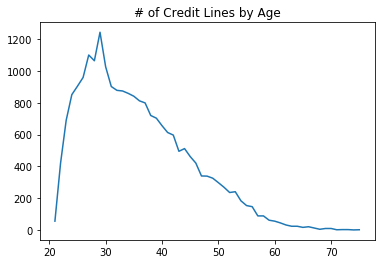

In [13]:
plt.plot(ages, counts);
plt.title('# of Credit Lines by Age');

In [14]:
defaulted = len(training_data.loc[training_data['defaulted'] == 1])
no_default = len(training_data.loc[training_data['defaulted'] == 0])

print('Total defaulted:', defaulted, 'Total no Default:', no_default)

Total defaulted: 5028 Total no Default: 17471


# Baseline Models

##### KNN -----------------------

In [15]:

y_baseline = training_data['defaulted']
X_baseline = training_data.drop('defaulted', axis=1)

X_train , X_test, y_train, y_test = train_test_split(X_baseline, y_baseline, test_size = 0.20, random_state=42)


KNN_baseline = KNeighborsClassifier()
KNN_baseline.fit(X_train, y_train)

y_pred_default = KNN_baseline.predict(X_test)
y_train_default = KNN_baseline.predict(X_train)

KNN_baseline_f1 = f1_score(y_test, y_pred_default)

classrpt = print(classification_report(y_test, y_pred_default), '\n', '-'*70)
trainrpt = print(classification_report(y_train, y_train_default))
classrpt, trainrpt

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      3483
           1       0.38      0.18      0.24      1017

    accuracy                           0.75      4500
   macro avg       0.59      0.55      0.55      4500
weighted avg       0.70      0.75      0.71      4500
 
 ----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     13988
           1       0.67      0.32      0.43      4011

    accuracy                           0.81     17999
   macro avg       0.75      0.64      0.66     17999
weighted avg       0.79      0.81      0.79     17999



(None, None)

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_default)

array([[3193,  290],
       [ 838,  179]])

KNN Appears to overfit the data. 

##### Logistic Regression ------------------------------

In [17]:
base_logreg = LogisticRegression(random_state=42, max_iter= 10**4)

base_logreg.fit(X_train, y_train)

y_log_default_test = base_logreg.predict(X_test)
y_log_default_train = base_logreg.predict(X_train)

residuals1 = np.abs(y_train - y_log_default_train)
print('Training Data:')
print(pd.Series(residuals1).value_counts())
print(pd.Series(residuals1).value_counts(normalize=True))

Training Data:
0    13987
1     4012
Name: defaulted, dtype: int64
0    0.777099
1    0.222901
Name: defaulted, dtype: float64


In [18]:
residuals2 = np.abs(y_test - y_log_default_test)
print('Testing Data:')
print(pd.Series(residuals2).value_counts())
print(pd.Series(residuals2).value_counts(normalize=True))

Testing Data:
0    3483
1    1017
Name: defaulted, dtype: int64
0    0.774
1    0.226
Name: defaulted, dtype: float64


## Feature Engineering

Add a credit utilization feature with formula: (total balance \ credit limit)*100 

In [25]:
training_data['outstanding'] = training_data['statement_amt_sept'] + training_data['statement_amt_aug'] + training_data['statement_amt_jul'] + training_data['statement_amt_jun'] + training_data['statement_amt_may'] + training_data['statement_amt_apr']
training_data['paid'] = training_data['amt_paid_sept'] + training_data['amt_paid_aug'] + training_data['amt_paid_jul'] + training_data['amt_paid_jun'] + training_data['amt_paid_may'] + training_data['amt_paid_april']

training_data['balance'] = training_data['outstanding'] - training_data['paid']
training_data['utilization'] = (training_data['balance']/training_data['credit_amount'])*100

In [26]:
training_data

,credit_amount,gender,education,marital_status,age,repay_status_sept,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,statement_amt_sept,statement_amt_aug,statement_amt_jul,statement_amt_jun,statement_amt_may,statement_amt_apr,amt_paid_sept,amt_paid_aug,amt_paid_jul,amt_paid_jun,amt_paid_may,amt_paid_april,defaulted,outstanding,paid,balance,utilization
0,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,1250323,188911,1061412,482.460000
1,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,1956,1956,0,0.000000
2,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000
3,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,279502,9611,269891,337.363750
4,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,31910,5300,26610,266.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,40000,2,2,1,38,0,0,3,2,2,2,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0,1,234247,10269,223978,559.945000
22496,350000,1,1,1,42,-1,-1,-1,-1,-1,-1,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731,0,24410,31261,-6851,-1.957429
22497,100000,2,3,2,46,1,-1,2,2,-1,0,0,203,203,0,7856,16544,203,0,0,7856,10000,865,0,24806,18924,5882,5.882000
22498,20000,2,3,1,50,-1,-1,-1,-1,-2,-2,5141,3455,6906,0,0,0,3754,6906,290,0,0,0,1,15502,10950,4552,22.760000


In [30]:
training_data.utilization.head(30)

0     482.460000
1       0.000000
2       0.000000
3     337.363750
4     266.100000
5      55.022083
6     495.004545
7     214.906000
8      -0.260000
9     261.448000
10    540.453333
11    -12.567000
12    483.060000
13     77.405417
14    101.720000
15    102.268846
16    276.912500
17    390.936875
18    261.523333
19     15.876000
20    475.340000
21     -2.614902
22      0.000000
23    426.710000
24    528.296000
25    343.046000
26    102.687500
27     -1.666800
28    202.274444
29    451.876667
Name: utilization, dtype: float64

 # Dummies

In [58]:
# gender_dummies = pd.get_dummies(training_data['gender'], prefix='gender', drop_first=True)
# education_dummies = pd.get_dummies(training_data['education'], prefix='education', drop_first=True)
# marital_status_dummies = pd.get_dummies(training_data['marital_status'], prefix='marital_status', drop_first=True)

# training_data = training_data.drop(['gender', 'education', 'marital_status'], axis=1)



# #training_data = pd.concat([gender_dummies, education_dummies, marital_status_dummies], axis=1)

In [79]:
training_data.columns.to_list()

['credit_amount',
 'gender',
 'education',
 'marital_status',
 'age',
 'repay_status_sept',
 'repay_status_aug',
 'repay_status_jul',
 'repay_status_jun',
 'repay_status_may',
 'repay_status_apr',
 'statement_amt_sept',
 'statement_amt_aug',
 'statement_amt_jul',
 'statement_amt_jun',
 'statement_amt_may',
 'statement_amt_apr',
 'amt_paid_sept',
 'amt_paid_aug',
 'amt_paid_jul',
 'amt_paid_jun',
 'amt_paid_may',
 'amt_paid_april',
 'defaulted']

# Random Forest with Grid Search CV

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [32]:
param_grid = { 
    'max_leaf_nodes': range(10,48,2),
    'max_depth': list(range(2,10)),
    'max_features': list(range(3,7)),
    'bootstrap':['True','False'],
}


In [33]:
grid_tree=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

In [34]:
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 1216 candidates, totalling 6080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 6080 out of 6080 | elapsed: 35.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 4, 5, 6],
                         'max_leaf_nodes': range(10, 48, 2)},
             scoring='f1', verbose=1)

In [35]:

print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.4698269553169466
{'bootstrap': 'False', 'max_depth': 7, 'max_features': 6, 'max_leaf_nodes': 20}
RandomForestClassifier(bootstrap='False', max_depth=7, max_features=6,
                       max_leaf_nodes=20)


In [36]:
from sklearn.metrics import f1_score

y_pred = grid_tree.best_estimator_.predict(X_test)


print("F1:",f1_score(y_test, y_pred))

F1: 0.48617363344051445


# Ensemble

In [86]:
from sklearn.ensemble import BaggingClassifier

In [87]:
bc_lr = BaggingClassifier(
            base_estimator=LogisticRegression(random_state = 1, class_weight='balanced'), 
            n_estimators= 10000,
            max_samples= 0.8,
            max_features= 6,
            oob_score= True
                )

In [88]:
bc_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                    random_state=1),
                  max_features=6, max_samples=0.8, n_estimators=10000,
                  oob_score=True)

In [89]:
bc_lr.oob_score_

0.6956497583199066

In [90]:
bc_lr_preds = bc_lr.predict(X_test)

bc_lr_f1 = f1_score(y_test, bc_lr_preds)

print(bc_lr_f1)

0.4703125


-------------------------------------------

# more dummies

In [ ]:
gender_dummies = pd.get_dummies(training_data['gender'], prefix='gender', drop_first=True)


training_data = training_data.drop(['gender', 'education', 'marital_status'], axis=1)

training_data = pd.concat([gender_dummies, education_dummies, marital_status_dummies], axis=1)